In [152]:
#import neccessary lib
import pandas as pd, numpy as np, seaborn as sbn, datawig as dw, ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
from pandas_profiling import ProfileReport as pr
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score,classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier 
from catboost import CatBoostClassifier 
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('dark_background')

In [2]:
training_set = pd.read_csv('./Datasets/Train_Validate.csv', sep=',')

In [3]:
training_set.shape

(54808, 14)

In [5]:
training_set.head(10).style.background_gradient(cmap = 'Accent')

In [6]:
training_set.sample(5)

employee_id         department     region   education gender  \
40907         5599                 HR  region_16  Bachelor's      m   
51939        73176  Sales & Marketing   region_7  Bachelor's      m   
6978         13157            Finance   region_2  Bachelor's      m   
12814         7458         Operations  region_22  Bachelor's      f   
22921        28446         Technology   region_7  Bachelor's      f   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
40907               other                1   35                   5.0   
51939               other                3   33                   1.0   
6978                other                2   38                   3.0   
12814               other                1   33                   1.0   
22921               other                1   37                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
40907                 10              0            0                  47   
51939                  4              0            0                  51   
6978                  11              0            0                  64   
12814                  8              0            0                  56   
22921                  4              0            0                  80   

       is_promoted  
40907            0  
51939            0  
6978             0  
12814            0  
22921            0

In [7]:
training_set.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [9]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [10]:
training_set.describe().style.background_gradient(cmap = 'Accent')

In [11]:
training_set.describe(include='object')

department    region   education gender recruitment_channel
count               54808     54808       52399  54808               54808
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                16840     12343       36669  38496               30446

In [12]:
training_set[training_set.duplicated()]# chgeck if any row is having a duplicate 

Empty DataFrame
Columns: [employee_id, department, region, education, gender, recruitment_channel, no_of_trainings, age, previous_year_rating, length_of_service, KPIs_met >80%, awards_won?, avg_training_score, is_promoted]
Index: []

In [ ]:
training_set[(training_set['department']=='Operations')& (training_set['region'] =='region_2') 
              & (training_set['gender'] == 'f') & (training_set['recruitment_channel'] == 'other')
              & (training_set['age'] == 41) & (training_set['no_of_trainings'] == 1) & (training_set['previous_year_rating'] == 4.0)]

In [10]:
# training_set.drop_duplicates(keep='first', inplace=True)

In [13]:
training_set.head(5).style.background_gradient(cmap = 'Accent')

In [14]:
training_set.drop(labels='employee_id', axis=1, inplace=True) # drop the particular column 

In [15]:
training_set.sample()

department    region         education gender recruitment_channel  \
50225         HR  region_2  Master's & above      f               other   

       no_of_trainings  age  previous_year_rating  length_of_service  \
50225                1   53                   4.0                 12   

       KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
50225              0            0                  46            0

In [16]:
training_set.rename(columns={'region':'work_region', 'education':'education_level', 'no_of_trainings':'total_training',
                             'awards_won?':'awards_won_last_year?'}, inplace=True)

In [17]:
training_set.sample()

department work_region   education_level gender recruitment_channel  \
41814  Technology   region_22  Master's & above      f               other   

       total_training  age  previous_year_rating  length_of_service  \
41814               1   40                   3.0                  6   

       KPIs_met >80%  awards_won_last_year?  avg_training_score  is_promoted  
41814              0                      0                  85            0

In [15]:
profile = pr(df=training_set, explorative=True)
profile.to_file('profile.html') 

In [18]:
for empty in training_set.columns:  # calculate the total number of missing values in the dataset
    print(training_set[empty].isna().sum())

0
0
2409
0
0
0
0
4124
0
0
0
0
0


In [19]:
for empty in training_set.columns:  #calculate the % of the missing data
    na = training_set[empty].isna().sum()
    total= training_set[empty].shape
    perc = (na/total) *100
    print("{} has {} missing value which is {} percent of the total".format(empty, training_set[empty].isna().sum()
                                                                            ,str(perc)))  #check and list the sum if null in each column

department has 0 missing value which is [0.] percent of the total
work_region has 0 missing value which is [0.] percent of the total
education_level has 2409 missing value which is [4.39534375] percent of the total
gender has 0 missing value which is [0.] percent of the total
recruitment_channel has 0 missing value which is [0.] percent of the total
total_training has 0 missing value which is [0.] percent of the total
age has 0 missing value which is [0.] percent of the total
previous_year_rating has 4124 missing value which is [7.52444899] percent of the total
length_of_service has 0 missing value which is [0.] percent of the total
KPIs_met >80% has 0 missing value which is [0.] percent of the total
awards_won_last_year? has 0 missing value which is [0.] percent of the total
avg_training_score has 0 missing value which is [0.] percent of the total
is_promoted has 0 missing value which is [0.] percent of the total


## We will deal with the missing values later, we are looking at 10% missing data, i dont think just removing the rows will help

## Let take some deep dive inside the data, look at some features and how they relate with one another

In [20]:
training_set.sample(3).style.background_gradient(cmap = 'Accent')

In [21]:
training_set.describe().style.background_gradient(cmap = 'Accent')

In [23]:
training_set.department.value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [24]:
training_set.work_region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: work_region, dtype: int64

In [25]:
training_set.education_level.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education_level, dtype: int64

In [27]:
training_set.groupby(['education_level'])['age'].agg(np.std)

education_level
Bachelor's          7.047381
Below Secondary     1.829266
Master's & above    7.070637
Name: age, dtype: float64

In [28]:
training_set.groupby(['education_level', 'department'])[['previous_year_rating','length_of_service']].mean()

previous_year_rating  length_of_service
education_level  department                                                
Bachelor's       Analytics                      3.545834           4.609100
                 Finance                        3.498191           4.431135
                 HR                             3.413254           4.896393
                 Legal                          3.387481           4.217445
                 Operations                     3.621540           5.926745
                 Procurement                    3.273020           5.503756
                 R&D                            3.533333           4.234317
                 Sales & Marketing              3.064602           5.542211
                 Technology                     3.161114           5.222964
Below Secondary  Finance                        3.515152           1.745283
                 HR                             3.573529           1.570312
                 Legal                          3.875000           1.707692
                 Operations                     3.555556           1.840909
                 Procurement                    3.217391           1.674419
                 Technology                     3.413793           1.666667
Master's & above Analytics                      3.611166           6.633558
                 Finance                        3.535354           6.953908
                 HR                             3.607387           8.027285
                 Legal                          3.352564           7.820513
                 Operations                     3.664762           7.941548
                 Procurement                    3.344392           7.986635
                 R&D                            3.610553           5.109557
                 Sales & Marketing              3.106512           7.526164
                 Technology                     3.150183           7.767304

In [29]:
training_set[['education_level','is_promoted']].groupby(['education_level']).agg(['count','sum'])

is_promoted      
                       count   sum
education_level                   
Bachelor's             36669  3008
Below Secondary          805    67
Master's & above       14925  1471

In [30]:
# checking the relationship between KPI and the label
x = pd.crosstab(training_set['KPIs_met >80%'], training_set['is_promoted'])
x.style.background_gradient(cmap = 'bone')

In [31]:
training_set[(training_set['length_of_service'] > 5) & (training_set['is_promoted'] == 1)]

department work_region   education_level gender  \
39     Sales & Marketing   region_28        Bachelor's      m   
60     Sales & Marketing    region_4  Master's & above      m   
69             Analytics   region_31        Bachelor's      m   
71            Technology   region_22  Master's & above      m   
85            Operations   region_11  Master's & above      f   
...                  ...         ...               ...    ...   
54657        Procurement    region_7        Bachelor's      m   
54695         Operations    region_2        Bachelor's      f   
54757         Technology    region_7  Master's & above      m   
54792  Sales & Marketing   region_14        Bachelor's      m   
54796  Sales & Marketing   region_25  Master's & above      m   

      recruitment_channel  total_training  age  previous_year_rating  \
39               sourcing               1   33                   5.0   
60                  other               1   50                   4.0   
69                  other               1   30                   3.0   
71                  other               1   34                   5.0   
85               sourcing               1   42                   5.0   
...                   ...             ...  ...                   ...   
54657               other               1   31                   5.0   
54695               other               2   52                   5.0   
54757               other               1   54                   4.0   
54792               other               1   59                   3.0   
54796               other               1   34                   3.0   

       length_of_service  KPIs_met >80%  awards_won_last_year?  \
39                     6              1                      0   
60                    17              1                      0   
69                     7              1                      0   
71                     7              1                      0   
85                    11              1                      0   
...                  ...            ...                    ...   
54657                  6              1                      0   
54695                 18              1                      0   
54757                  7              0                      0   
54792                 11              0                      0   
54796                  7              0                      0   

       avg_training_score  is_promoted  
39                     51            1  
60                     47            1  
69                     84            1  
71                     78            1  
85                     60            1  
...                   ...          ...  
54657                  68            1  
54695                  56            1  
54757                  81            1  
54792                  65            1  
54796                  60            1  

[2014 rows x 13 columns]

### let calculate the 90th percentile of the length of service for the dataset

In [24]:
def percentage_value_cal(percentage, value):
    """
    A simple function that calculate a given percentage of a value
    calculate the percentage value of a given value, eg 10% of 1000. ans = 100
    parameter : percentage = percentage value you want to calculate
    parameter : value = the value on which you want to calculate the percetage
    """
    return (percentage/100)*value
    
    

In [25]:
ninty_per_range = percentage_value_cal(90, 37)

### let deal with the missing value in the dataset now, there are many options we can use to solve missing value problem, each one has its benefit and cons, instead of just finding the mean, median, etc or dropping the rows all together we will predict this values using datawig

In [55]:
def fill_null_value(dataframe):
    for ind, index in enumerate(dataframe.index):
        if pd.isna(dataframe.education_level[index]) == True:
            dataframe.education_level[index] = str(dataframe.education_level_imputed[index])
        else:
            continue
    return dataframe

def fill_null(dataframe):
    for ind, index in enumerate(dataframe.index):
        if pd.isna(dataframe.previous_year_rating[index]) == True:
            dataframe.previous_year_rating[index] = str(dataframe.previous_year_rating_imputed[index])
        else:
            continue
    return dataframe

def predict_null_value(dataframe, epoch, input_column, output_column='education_level', model_dir = '' ):
    data = dataframe.drop(labels='previous_year_rating', axis=1)
    train, test = dw.utils.random_split(data)
    imputer = dw.SimpleImputer(input_columns=input_column, output_column= output_column,output_path=model_dir )
    imputer.fit(train, num_epochs = epoch)
    imputed = imputer.predict(data)
    imputed_edu = fill_null_value(imputed)
    imputed_edu.drop(['education_level_imputed','education_level_imputed_proba'], axis=1, inplace=True)
    imputed_edu['previous_year_rating'] = dataframe['previous_year_rating']
    return imputed_edu
def predict_null(dataframe, epoch, input_column, output_column, model_dir = '' ):
    train, test = dw.utils.random_split(dataframe)
    imputer = dw.SimpleImputer(input_columns=input_column, output_column= output_column,output_path=model_dir )
    imputer.fit(train, num_epochs = epoch)
    imputed = imputer.predict(dataframe)
    imputed_rating = fill_null(imputed)
    imputed_rating = imputed_rating.drop(['previous_year_rating_imputed'], axis=1)
    return imputed_rating
attribute = np.array(training_set.columns)
edu_list = attribute.tolist()
edu_list.pop(2)
edu_list.pop(6)
attribute = np.array(training_set.columns)
rating = attribute.tolist()
rating.pop(7)

#imputer1 , test1 = predict_null_value(dataframe=training_set, epoch=50, input_column=attribute, output_column='education_level')    

'previous_year_rating'

In [43]:
imputed_edu = dw.SimpleImputer.load('./education_level/',)
edu_list = imputed_edu.predict(training_set.drop('previous_year_rating', axis=1))
imputed_rating = dw.SimpleImputer.load('./previous_year_rating/',)
imputed_data = imputed_rating.predict(edu_list)
imputed_data

In [56]:
imputer_edu = predict_null_value(dataframe=training_set, epoch=50, input_column=edu_list, output_column='education_level')

2020-09-08 16:06:04,352 [INFO]  
========== start: fit model
2020-09-08 16:06:04,353 [WARNING]  Already bound, ignoring bind()
2020-09-08 16:06:12,707 [INFO]  Epoch[0] Batch [0-1180]	Speed: 2263.76 samples/sec	cross-entropy=0.501552	education_level-accuracy=0.719729
2020-09-08 16:06:22,950 [INFO]  Epoch[0] Train-cross-entropy=0.486760
2020-09-08 16:06:22,952 [INFO]  Epoch[0] Train-education_level-accuracy=0.723161
2020-09-08 16:06:22,953 [INFO]  Epoch[0] Time cost=18.599
2020-09-08 16:06:22,958 [INFO]  Saved checkpoint to "education_level\model-0000.params"
2020-09-08 16:06:24,446 [INFO]  Epoch[0] Validation-cross-entropy=0.473145
2020-09-08 16:06:24,447 [INFO]  Epoch[0] Validation-education_level-accuracy=0.734078
2020-09-08 16:06:34,047 [INFO]  Epoch[1] Batch [0-1180]	Speed: 1969.16 samples/sec	cross-entropy=0.461135	education_level-accuracy=0.737987
2020-09-08 16:06:44,261 [INFO]  Epoch[1] Train-cross-entropy=0.461414
2020-09-08 16:06:44,263 [INFO]  Epoch[1] Train-education_level-ac

In [57]:
imputed_data = predict_null(dataframe=imputer_edu, epoch=50, input_column=rating, output_column='previous_year_rating')

In [87]:
rating

['department',
 'work_region',
 'education_level',
 'gender',
 'recruitment_channel',
 'total_training',
 'age',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won_last_year?',
 'avg_training_score',
 'is_promoted']

In [58]:
imputed_data.isna().sum()

department               0
work_region              0
education_level          0
gender                   0
recruitment_channel      0
total_training           0
age                      0
length_of_service        0
KPIs_met >80%            0
awards_won_last_year?    0
avg_training_score       0
is_promoted              0
previous_year_rating     0
dtype: int64

### Our data can now be considered clean and ready for visualization 

## Univeriate and bivariate analysis

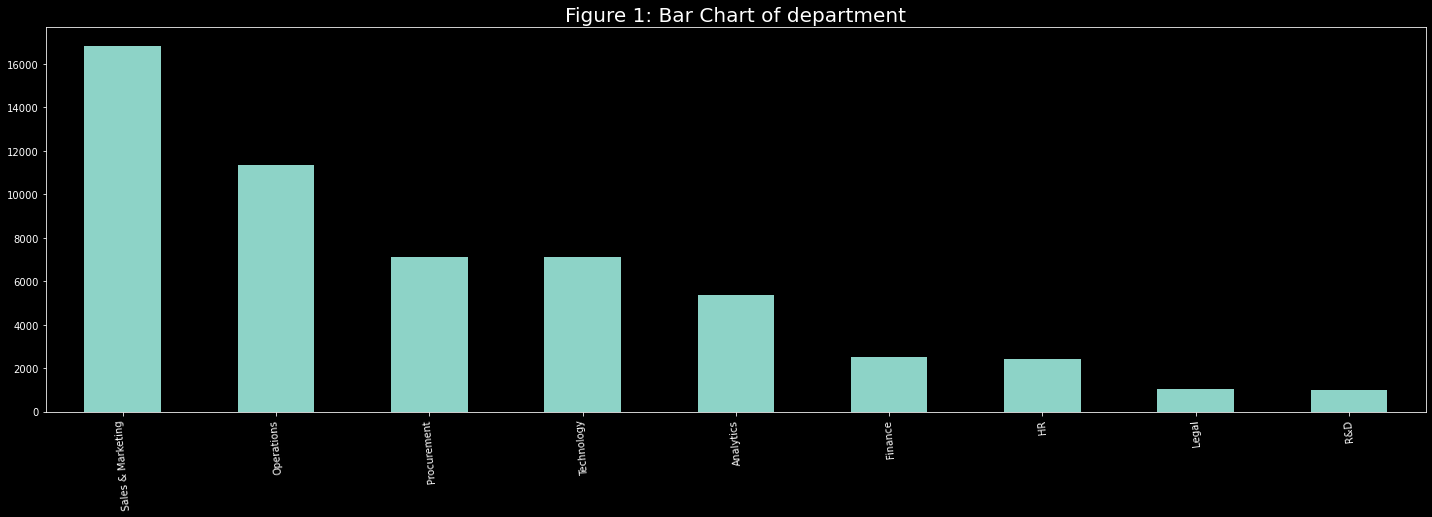

In [59]:
plot = imputed_data['department'].value_counts().plot(kind = 'bar')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 95)
plt.tight_layout()
plt.title('Figure 1: Bar Chart of department', fontsize = 20)
plt.show();

In [60]:
imputed_data['work_region']

0         region_7
1        region_22
2        region_19
3        region_23
4        region_26
           ...    
54803    region_14
54804    region_27
54805     region_1
54806     region_9
54807    region_22
Name: work_region, Length: 54808, dtype: object

Text(0.5, 0, 'Education Level of Employee')

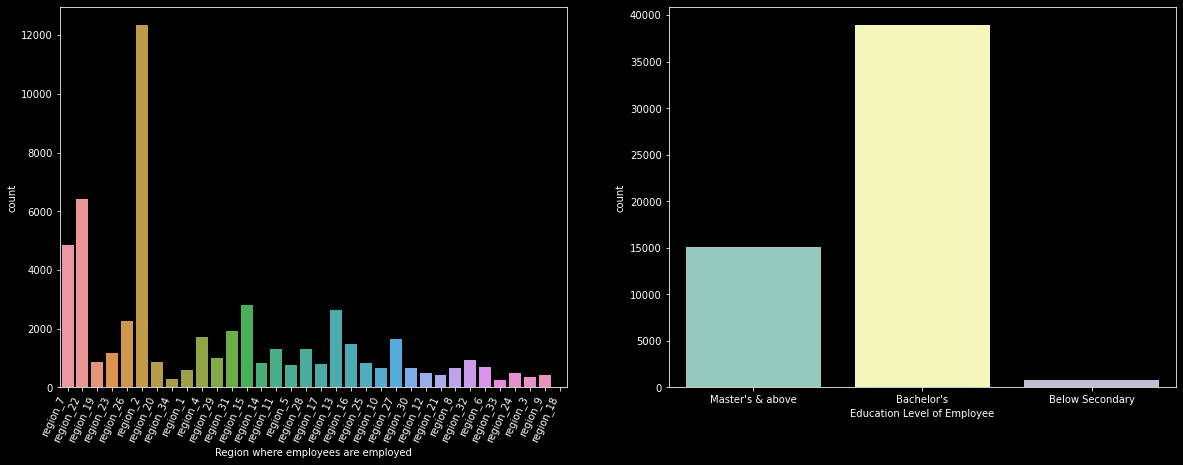

In [61]:
#plotting work_region and education level side bu side 
plt.subplot(1, 2, 1) # set the subplot to 1 row, 2 column and first index
chart = sbn.countplot(imputed_data['work_region'])
plt.xlabel('Region where employees are employed')
_ = chart.set_xticklabels(labels=chart.get_xticklabels(),rotation = 65, horizontalalignment='right')
plt.subplot(1, 2, 2) # set the subplot to 1 row, 2 column and second index
chart = sbn.countplot(imputed_data['education_level'])
plt.xlabel('Education Level of Employee')


<AxesSubplot:xlabel='work_region', ylabel='count'>

Text(0.5, 0, 'Employees who are promoted and not')

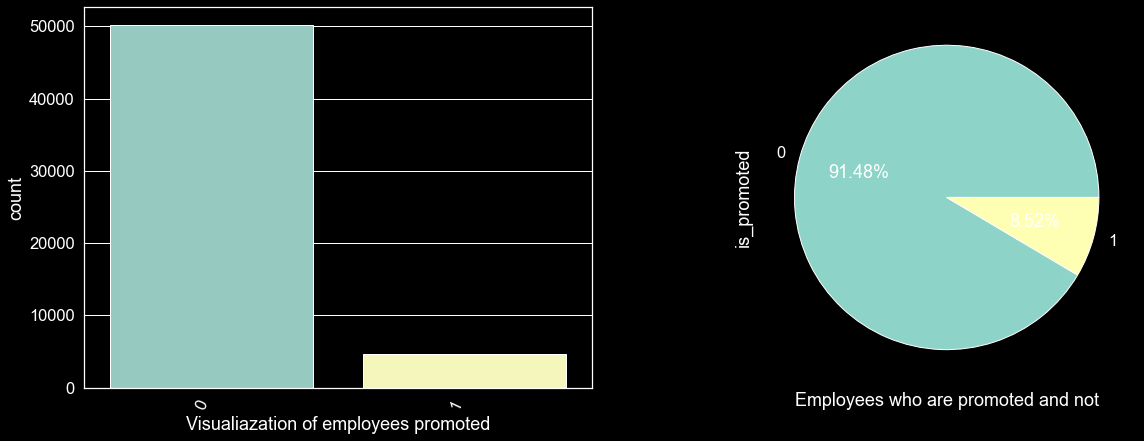

In [179]:
plt.subplot(1, 2, 1)
chart = sbn.countplot(imputed_data['is_promoted'],)
plt.xlabel('Visualiazation of employees promoted')
_ = chart.set_xticklabels(labels=chart.get_xticklabels(),rotation = 65, horizontalalignment='right')
plt.subplot(1, 2, 2)
plot = imputer_rating['is_promoted'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.xlabel('Employees who are promoted and not')


<AxesSubplot:xlabel='age'>

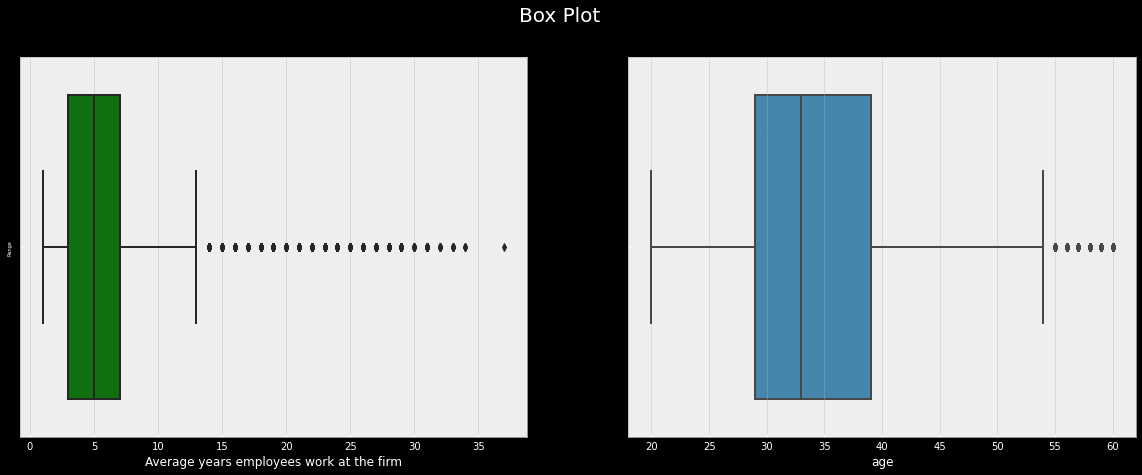

In [62]:
plt.style.use('bmh')
plt.suptitle('Box Plot', fontsize = 20)
plt.subplot(1,2,1)
sbn.boxplot(imputed_data.length_of_service, color='green')
plt.xlabel('Average years employees work at the firm', )
plt.ylabel('Range', fontsize=5)

plt.subplot(1,2,2)
sbn.boxplot(imputed_data['age'])

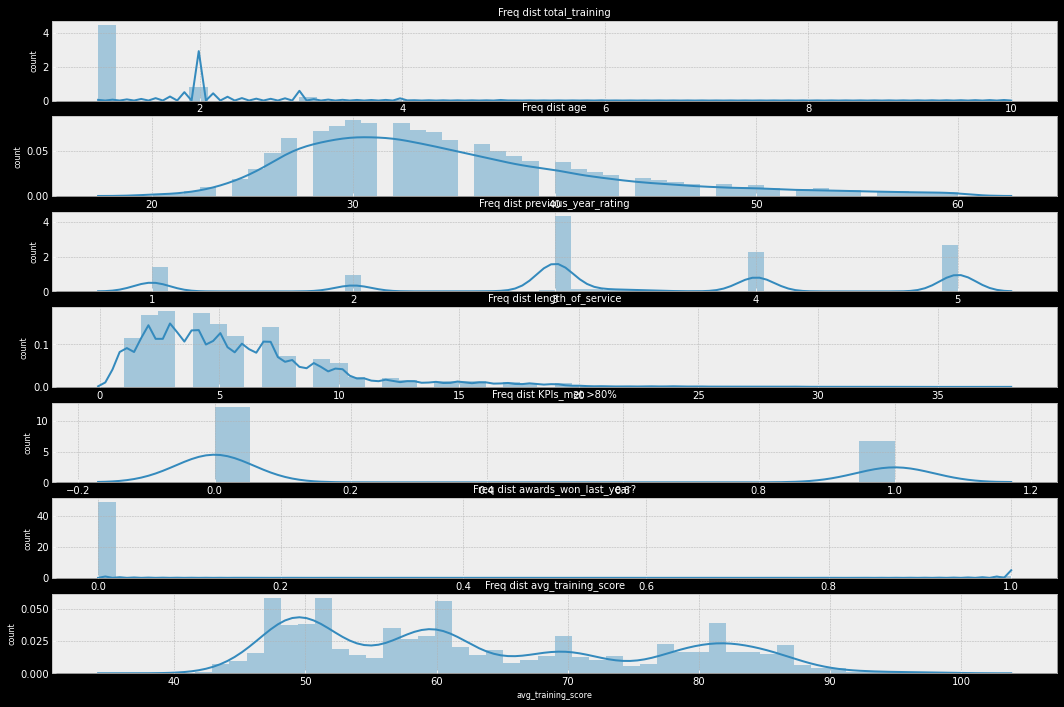

In [63]:
col_names = ["total_training","age","previous_year_rating","length_of_service","KPIs_met >80%",
             "awards_won_last_year?","avg_training_score",]
fig, ax = plt.subplots(len(col_names), figsize=(18,12))

for i, col_val in enumerate(col_names):
    sbn.distplot(imputed_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('count', fontsize=8)
plt.show()


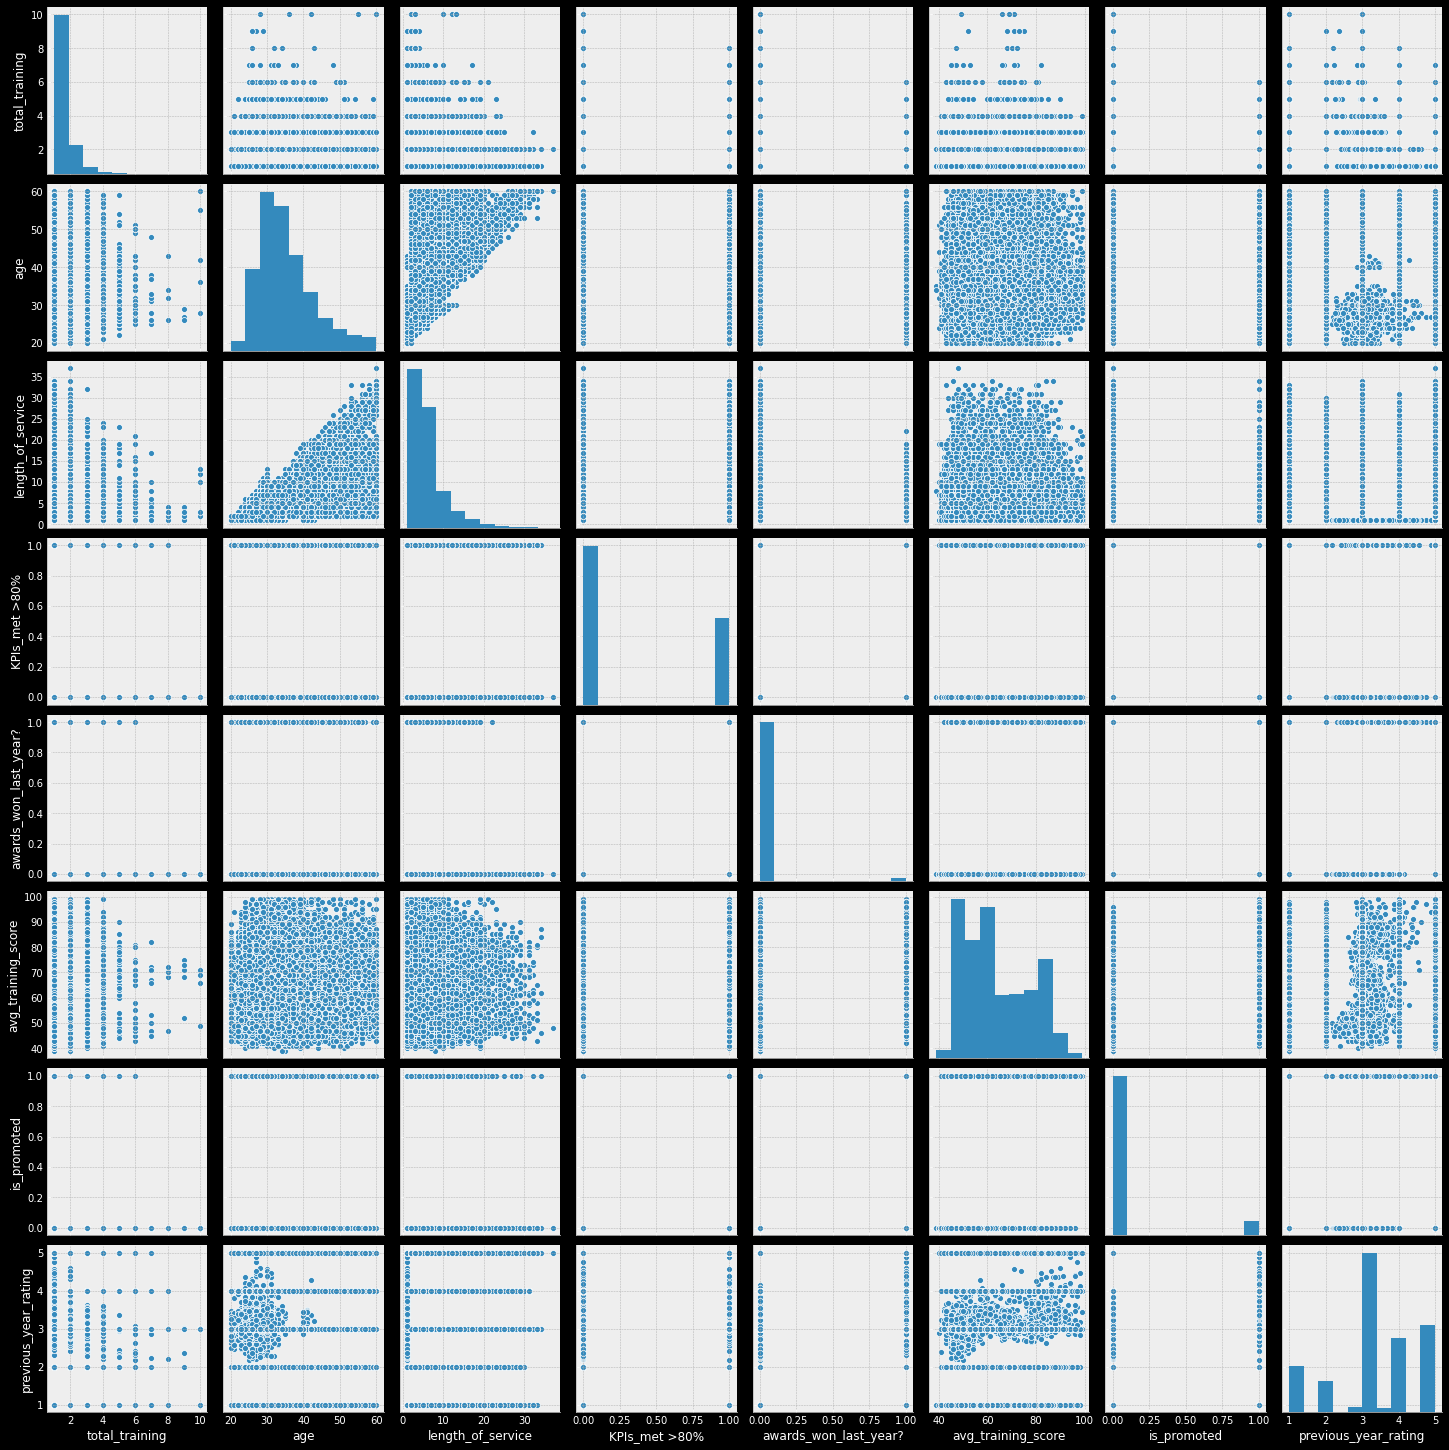

In [64]:
sbn.pairplot(imputed_data,)

In [ ]:
Looking at the plot we cant notice any strong linear patterns between the columns. That said, there’s always room to derive
other insights that might be useful.



<AxesSubplot:>

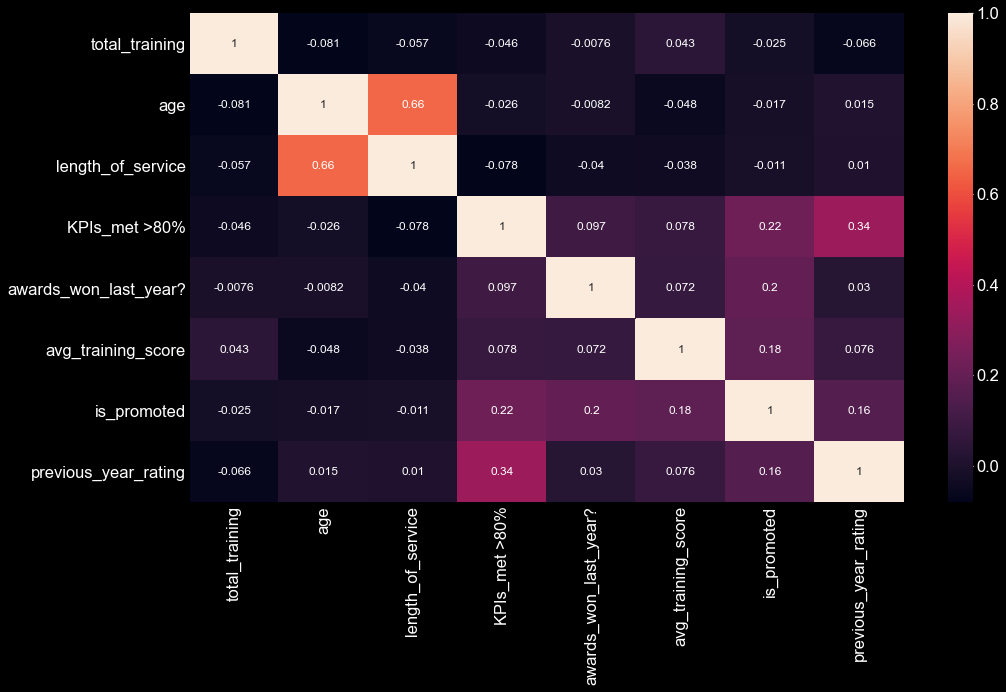

In [206]:
fig, ax = plt.subplots(figsize = (16, 9))
sbn.heatmap(imputed_data.corr(), annot = True, annot_kws={'size': 12})

In [ ]:
Note

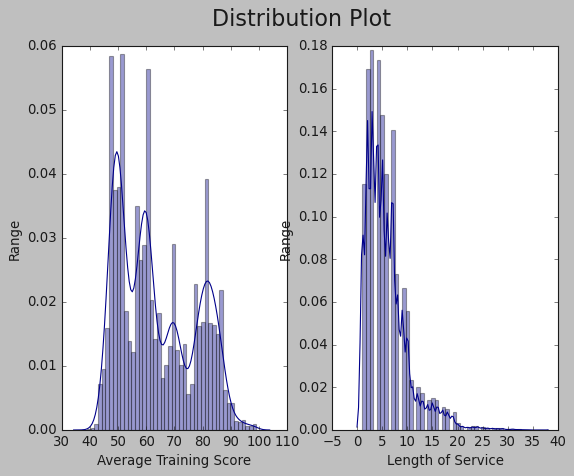

In [235]:
plt.style.use('classic')
plt.subplot(1, 2, 1)
sbn.distplot(imputed_data['avg_training_score'], color = 'darkblue')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Distribution plot for Length of Service
plt.subplot(1, 2, 2)
sbn.distplot(imputed_data['length_of_service'], color = 'darkblue')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Distribution Plot', fontsize = 20)
plt.show()

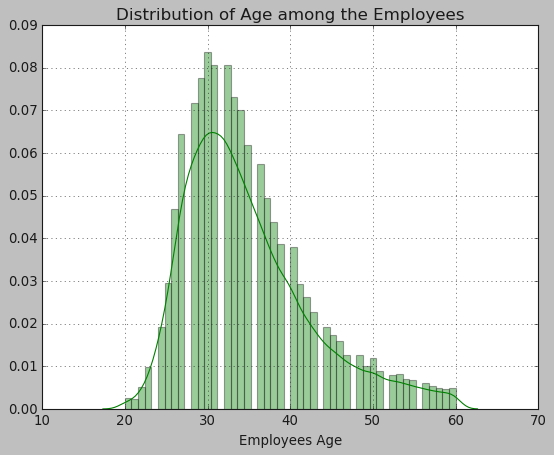

In [237]:
sbn.distplot(imputed_data['age'], color = 'green')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Employees Age')
plt.grid()
plt.show()

In [248]:
label = imputed_data['education_level'].value_counts().index, imputed_data['gender'].value_counts().index, imputed_data['recruitment_channel'].value_counts().index
label[0]

Index(['Bachelor's', 'Master's & above', 'Below Secondary'], dtype='object')

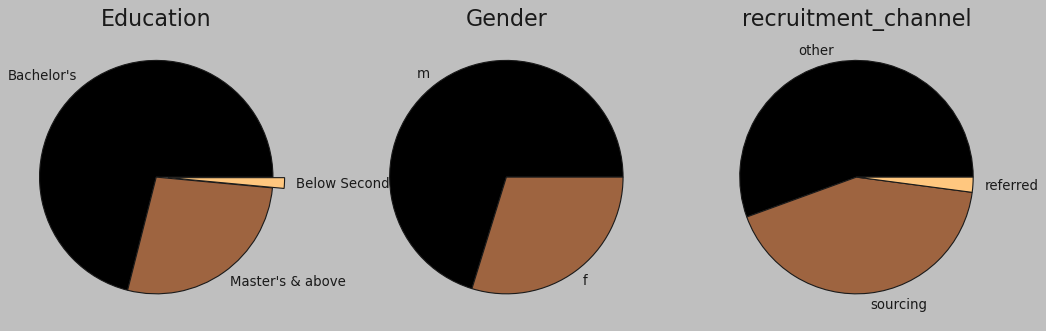

In [269]:
plt.subplot(1, 3, 1)
plt.rcParams['figure.figsize'] = (16,5)
label = (imputed_data['education_level'].value_counts().index, imputed_data['gender'].value_counts().index, 
                    imputed_data['recruitment_channel'].value_counts().index)
size = (imputed_data['education_level'].value_counts(), imputed_data['gender'].value_counts(),
                      imputed_data['recruitment_channel'].value_counts())
color = plt.cm.copper(np.linspace(0, 4, 9))
explod = [0, 0, 0.1]
plt.title('Education', fontsize = 20)
_ = plt.pie(size[0], labels=label[0], colors=color, explode=explod)

plt.subplot(1,3,2)
plt.title('Gender', fontsize = 20)
_ = plt.pie(size[1], labels=label[1], colors=color)

plt.subplot(1,3,3)
plt.title('recruitment_channel', fontsize = 20)
_ = plt.pie(size[2], labels=label[2], colors=color)

In [277]:
plt.rcParams['figure.figsize'] = (15, 4)
@interact_manual
def plot_plt(column = list(imputed_data.select_dtypes('object').columns),
          pal_color = ['cividis','afmhot_r','spring','Reds','Blues','Oranges', 'twilight', ]):
    sbn.countplot(imputed_data[column], palette = pal_color)
   
    plt.show()

interactive(children=(Dropdown(description='column', options=('department', 'work_region', 'education_level', …

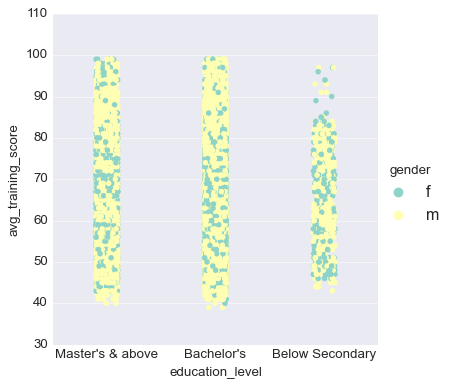

In [285]:
plt.style.use('seaborn-darkgrid')
sbn.catplot(x="education_level", y="avg_training_score", hue = "gender", data=imputed_data)

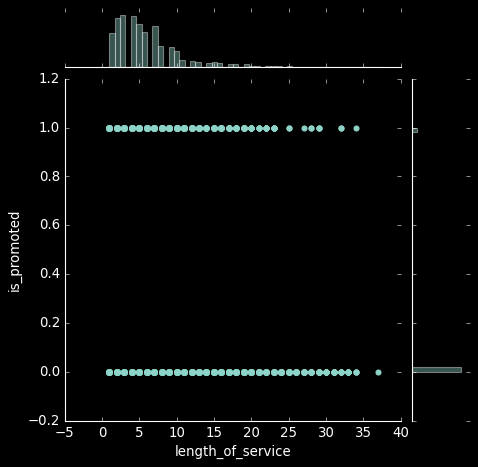

In [280]:
sbn.jointplot(x="length_of_service", y="is_promoted", data=imputed_data);

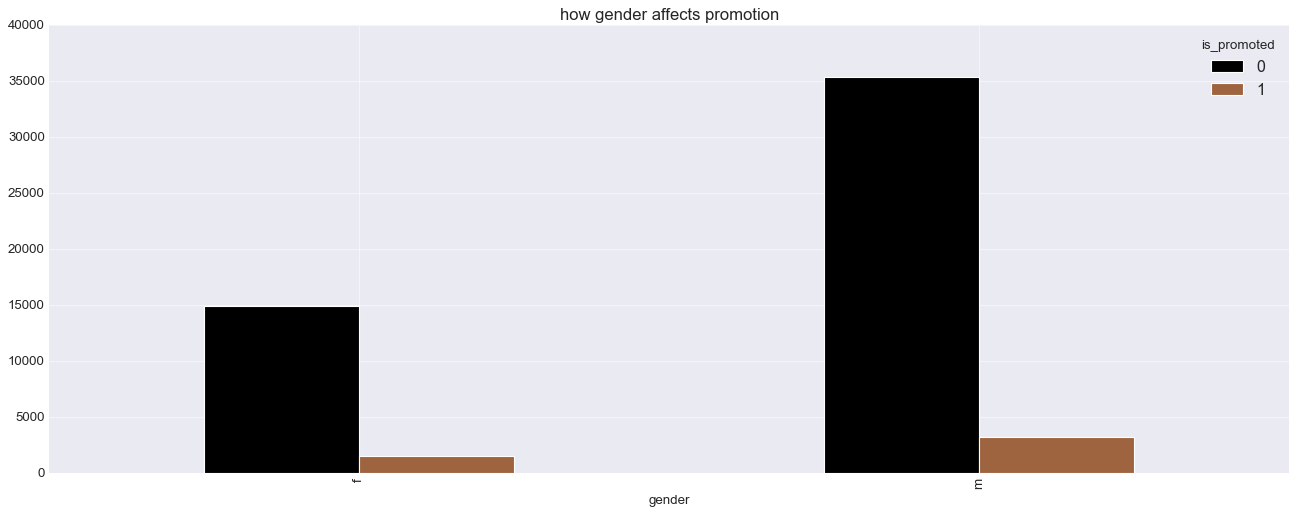

In [299]:
cross = pd.crosstab(imputed_data.gender, imputed_data.is_promoted)
cross.plot(kind = 'bar', stacked = False, color = color)
plt.title('how gender affects promotion', fontsize = 15)
plt.show()

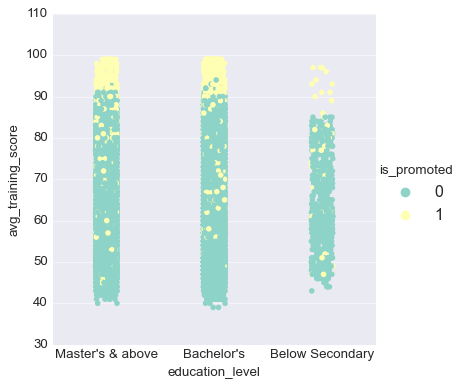

In [287]:
sbn.catplot(x="education_level", y="avg_training_score", hue = "is_promoted", data=imputed_data)

In [ ]:
the plot Clearly shows people with higher scores got a promotion.

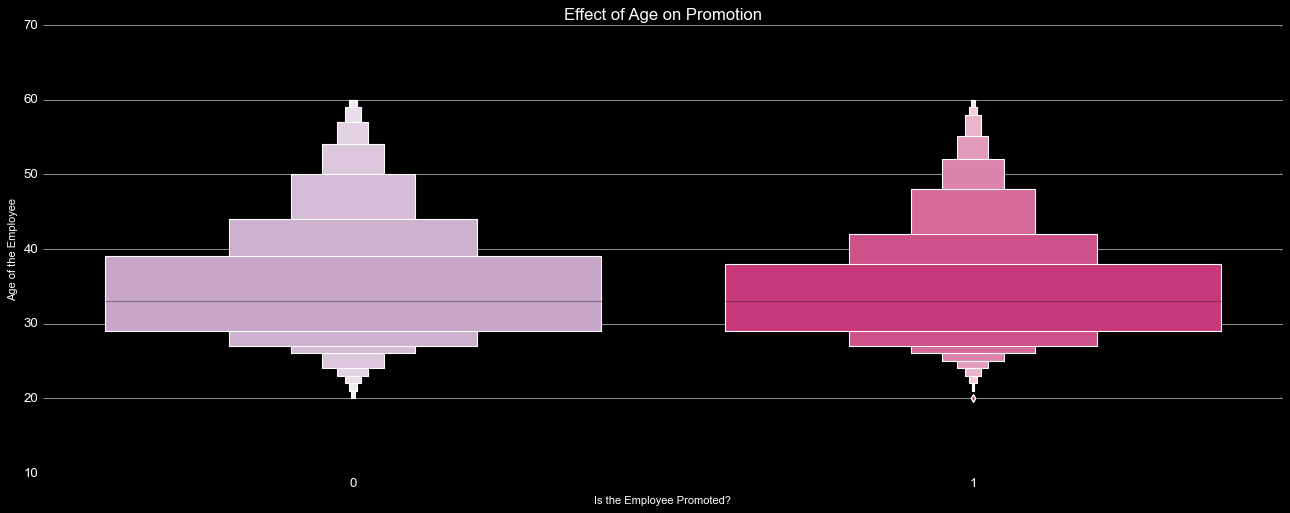

In [302]:
sbn.boxenplot(imputed_data['is_promoted'], imputed_data['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

In [ ]:
Detecting outliers 

<Figure size 900x900 with 0 Axes>

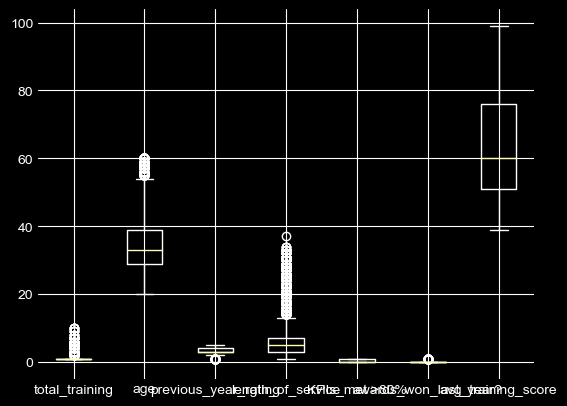

In [313]:
daata = imputed_data[col_names]
plt.style.use('dark_background')
plt.figure(figsize=(9, 9))
fig,ax = plt.subplots(1)
plot = plt.boxplot(daata.values, labels=col_names )
#plot.set_xticklabels(labels=plot.get_xticklabels(),rotation = 65, horizontalalignment='right')

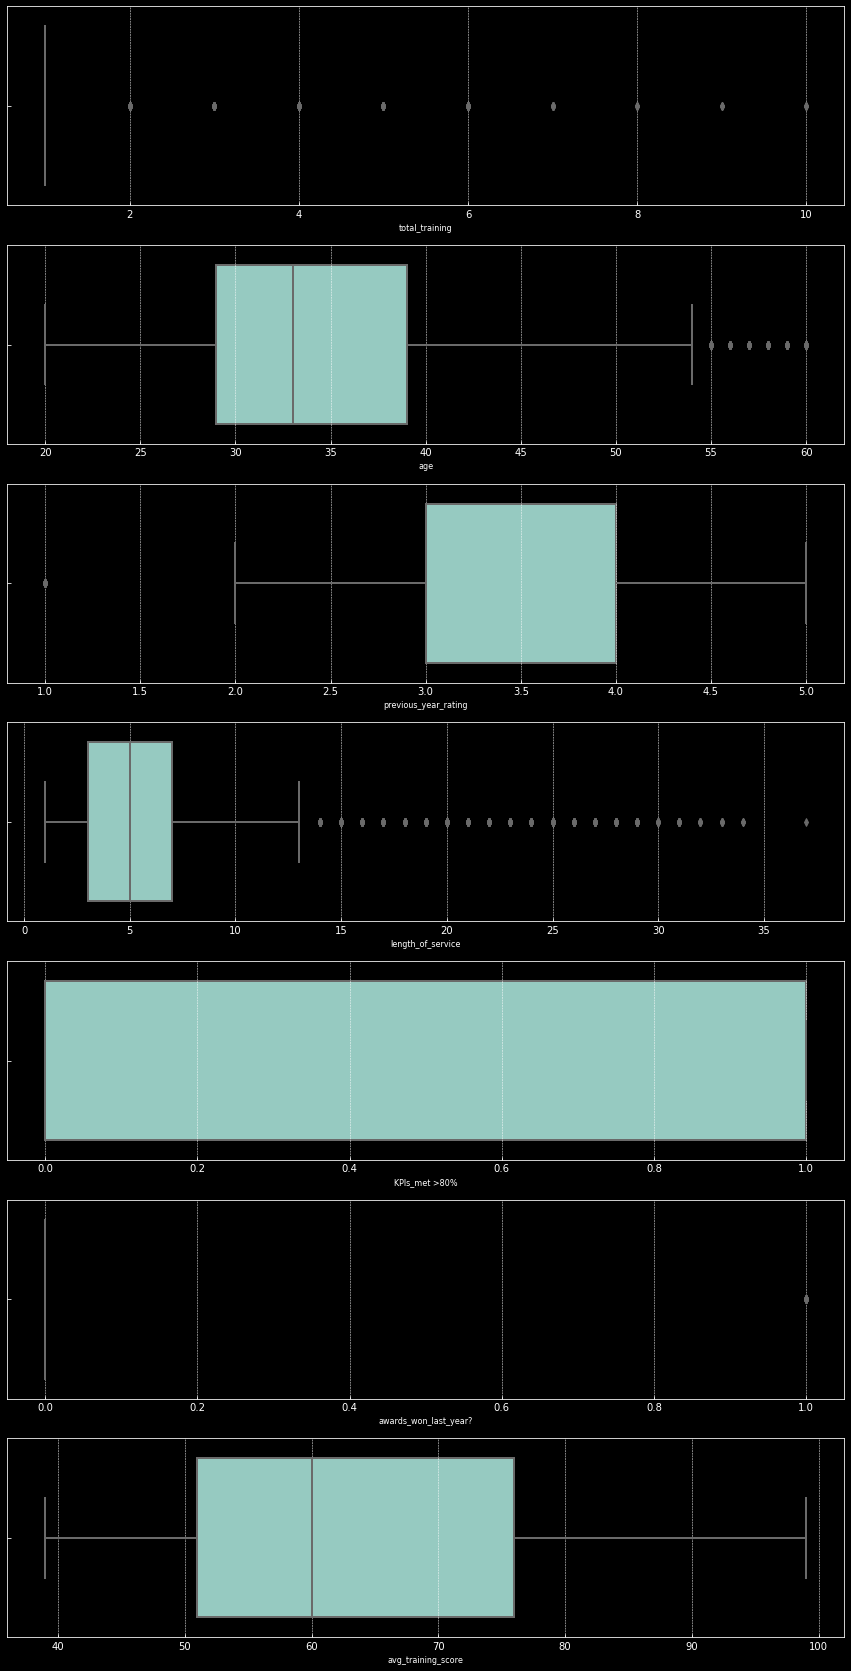

In [163]:

col_names = ["total_training","age","previous_year_rating","length_of_service","KPIs_met >80%",
             "awards_won_last_year?","avg_training_score",]
fig, ax = plt.subplots(len(col_names), figsize=(15,30))

for i, col_val in enumerate(col_names):
    sbn.boxplot(imputed_data[col_val], ax=ax[i])
    #ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

### Feature Engineering

In [ ]:
At this stage we have to get the data ready for modelling 

### dealing with categorical column 

In [ ]:
Our first option is not to encode the categorical data we us it like that in the algorithm but before we begine from our 
visualization we know our label is highly imbalanced but for now we will just ignore it and move on, if this iteration fails
to produce better result then we will apply other engineeering to it.


In [66]:
cat_feature =['department', 'work_region', 'education_level','gender','recruitment_channel']
imputed_data.sample(2)

department work_region education_level gender recruitment_channel  \
7832   Technology    region_7      Bachelor's      m               other   
45762  Operations   region_32      Bachelor's      m            sourcing   

       total_training  age  length_of_service  KPIs_met >80%  \
7832                1   37                 10              0   
45762               1   28                  2              0   

       awards_won_last_year?  avg_training_score  is_promoted  \
7832                       0                  81            0   
45762                      0                  59            0   

       previous_year_rating  
7832                    1.0  
45762                   3.0

In [80]:
label = 'is_promoted'
X= imputed_data.loc[:, imputed_data.columns != label ]
y = imputed_data.loc[:, label]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=102)

In [82]:
cat_model = CatBoostClassifier(task_type='CPU', iterations=100, random_state = 202, eval_metric="F1")

In [83]:
cat_model.fit(X_train, y_train, cat_features= cat_feature, plot=True, 
             eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.210108
0:	learn: 0.2352306	test: 0.2304300	best: 0.2304300 (0)	total: 22.8ms	remaining: 2.26s
1:	learn: 0.2076624	test: 0.2200903	best: 0.2304300 (0)	total: 46.2ms	remaining: 2.26s
2:	learn: 0.2192543	test: 0.2243736	best: 0.2304300 (0)	total: 65.2ms	remaining: 2.11s
3:	learn: 0.2147838	test: 0.2223489	best: 0.2304300 (0)	total: 77.8ms	remaining: 1.87s
4:	learn: 0.2193764	test: 0.2263936	best: 0.2304300 (0)	total: 90ms	remaining: 1.71s
5:	learn: 0.2080990	test: 0.2133795	best: 0.2304300 (0)	total: 102ms	remaining: 1.6s
6:	learn: 0.2337662	test: 0.2434881	best: 0.2434881 (6)	total: 115ms	remaining: 1.53s
7:	learn: 0.2875641	test: 0.2820655	best: 0.2820655 (7)	total: 126ms	remaining: 1.45s
8:	learn: 0.3482328	test: 0.3466667	best: 0.3466667 (8)	total: 139ms	remaining: 1.4s
9:	learn: 0.3832487	test: 0.3839332	best: 0.3839332 (9)	total: 153ms	remaining: 1.38s
10:	learn: 0.3827192	test: 0.3864583	best: 0.3864583 (10)	total: 164ms	remaining: 1.33s
11:	learn: 0.3828703	

In [84]:
y_pred = cat_model.predict(X_test)

In [85]:
print('F1_score is {} and Accuracy_score is {} while recall is {}'.format(f1_score(y_test, y_pred),
                                                                         accuracy_score(y_test, y_pred),
                                                                         recall_score(y_test, y_pred)))


F1_score is 0.47470817120622566 and Accuracy_score is 0.9402886050754685 while recall is 0.3187459177008491


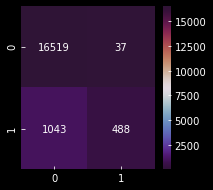

In [86]:
plt.rcParams['figure.figsize'] = (3, 3)
conf_metrix = confusion_matrix(y_test, y_pred)
sbn.heatmap(conf_metrix, annot = True, cmap = 'twilight_shifted', fmt = '.8g')
plt.show()

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16556
           1       0.93      0.32      0.47      1531

    accuracy                           0.94     18087
   macro avg       0.94      0.66      0.72     18087
weighted avg       0.94      0.94      0.93     18087



In [55]:
with no real feature engineering our f1 and recall score is very bad compare to the accuracy of 93%, this is mostly because of 
the imbalace data we have, next step is to solve this problem and hope our model improves.

0.9399015867750318

In [88]:
imput_data = imputed_data.copy()
label_encoder = LabelEncoder()
imput_data['department'] = label_encoder.fit_transform(imput_data['department'])
imput_data['education_level'] = label_encoder.fit_transform(imput_data['education_level'])
imput_data['gender'] = label_encoder.fit_transform(imput_data['gender'])
imput_data['work_region'] = label_encoder.fit_transform(imput_data['work_region'])
imput_data['recruitment_channel'] = label_encoder.fit_transform(imput_data['recruitment_channel'])


In [89]:
XX= imput_data.loc[:, imput_data.columns != label ]
yy = imput_data.loc[:, label]

In [90]:
sample_X, sample_y  = SMOTE().fit_sample(XX, yy.values.ravel())

In [91]:
X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_y, test_size=0.33, random_state=102)
cat_model_v2 = CatBoostClassifier(task_type='CPU', iterations=100, random_state = 202, eval_metric="F1")
cat_model_v2.fit(X_train, y_train, cat_features= cat_feature, plot=True, 
                eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.243921
0:	learn: 0.7611754	test: 0.7603235	best: 0.7603235 (0)	total: 25.8ms	remaining: 2.56s
1:	learn: 0.8026151	test: 0.8038709	best: 0.8038709 (1)	total: 50.7ms	remaining: 2.48s
2:	learn: 0.7923876	test: 0.7882666	best: 0.8038709 (1)	total: 68.1ms	remaining: 2.2s
3:	learn: 0.8109601	test: 0.8075355	best: 0.8075355 (3)	total: 88ms	remaining: 2.11s
4:	learn: 0.8149421	test: 0.8127360	best: 0.8127360 (4)	total: 103ms	remaining: 1.96s
5:	learn: 0.8145660	test: 0.8107137	best: 0.8127360 (4)	total: 119ms	remaining: 1.87s
6:	learn: 0.8231369	test: 0.8198377	best: 0.8198377 (6)	total: 138ms	remaining: 1.83s
7:	learn: 0.8241443	test: 0.8226598	best: 0.8226598 (7)	total: 156ms	remaining: 1.8s
8:	learn: 0.8328050	test: 0.8306839	best: 0.8306839 (8)	total: 173ms	remaining: 1.75s
9:	learn: 0.8355587	test: 0.8340108	best: 0.8340108 (9)	total: 191ms	remaining: 1.72s
10:	learn: 0.8431823	test: 0.8409119	best: 0.8409119 (10)	total: 209ms	remaining: 1.69s
11:	learn: 0.8495046	t

In [92]:
y_pred = cat_model_v2.predict(X_test)
print('F1_score is {} and Accuracy_score is {} while recall is {}'.format(f1_score(y_test, y_pred),
                                                                         accuracy_score(y_test, y_pred),
                                                                         recall_score(y_test, y_pred)))


F1_score is 0.8920979237682058 and Accuracy_score is 0.8947813737044088 while recall is 0.8710965867828613


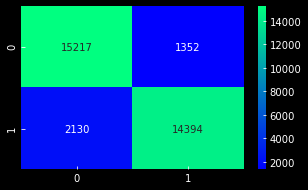

In [93]:
plt.rcParams['figure.figsize'] = (5, 3)
conf_metrix = confusion_matrix(y_test, y_pred)
sbn.heatmap(conf_metrix, annot = True, cmap = 'winter', fmt = '.8g')
plt.show()


In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     16569
           1       0.91      0.87      0.89     16524

    accuracy                           0.89     33093
   macro avg       0.90      0.89      0.89     33093
weighted avg       0.90      0.89      0.89     33093



In [116]:
new_data = imputed_data.drop(['work_region', 'recruitment_channel'], axis=1)
dummy =  pd.get_dummies(new_data.copy(), columns=['department', 'education_level', 'gender'])

In [142]:
Xx= dummy.loc[:, dummy.columns != label ]
yY = dummy.loc[:, label]

In [143]:
sam_X, sam_y  = SMOTE().fit_sample(Xx, yY.values.ravel())

In [145]:
X_train, X_test, y_train, y_test = train_test_split(sam_X, sam_y,
                                                   random_state = 0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# note that the test set using the fitted scaler in train dataset to transform in the test set
X_test_scaled = scaler.transform(X_test)

In [147]:
cat_model_v3 = CatBoostClassifier(task_type='CPU', iterations=100, random_state = 202, eval_metric="F1")
cat_model_v3.fit(X_train_scaled, y_train, plot=True, 
                eval_set=(X_test_scaled, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.250812
0:	learn: 0.7764332	test: 0.7748316	best: 0.7748316 (0)	total: 85.2ms	remaining: 8.43s
1:	learn: 0.7938490	test: 0.7905870	best: 0.7905870 (1)	total: 107ms	remaining: 5.26s
2:	learn: 0.8132801	test: 0.8123659	best: 0.8123659 (2)	total: 125ms	remaining: 4.04s
3:	learn: 0.8327496	test: 0.8304655	best: 0.8304655 (3)	total: 144ms	remaining: 3.45s
4:	learn: 0.8392866	test: 0.8362670	best: 0.8362670 (4)	total: 162ms	remaining: 3.08s
5:	learn: 0.8561970	test: 0.8541618	best: 0.8541618 (5)	total: 186ms	remaining: 2.91s
6:	learn: 0.8676727	test: 0.8652438	best: 0.8652438 (6)	total: 207ms	remaining: 2.75s
7:	learn: 0.8740684	test: 0.8716376	best: 0.8716376 (7)	total: 224ms	remaining: 2.58s
8:	learn: 0.8761812	test: 0.8743608	best: 0.8743608 (8)	total: 243ms	remaining: 2.45s
9:	learn: 0.8783609	test: 0.8766797	best: 0.8766797 (9)	total: 265ms	remaining: 2.38s
10:	learn: 0.8793189	test: 0.8794843	best: 0.8794843 (10)	total: 286ms	remaining: 2.31s
11:	learn: 0.8812682	

In [148]:
y_pred = cat_model_v3.predict(X_test_scaled)
print('F1_score is {} and Accuracy_score is {} while recall is {}'.format(f1_score(y_test, y_pred),
                                                                         accuracy_score(y_test, y_pred),
                                                                         recall_score(y_test, y_pred)))


F1_score is 0.9131309878431688 and Accuracy_score is 0.9139210211408058 while recall is 0.8992309521921826


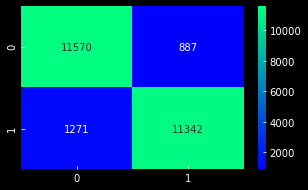

In [149]:
plt.rcParams['figure.figsize'] = (5, 3)
conf_metrix = confusion_matrix(y_test, y_pred)
sbn.heatmap(conf_metrix, annot = True, cmap = 'winter', fmt = '.8g')
plt.show()

In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     12457
           1       0.93      0.90      0.91     12613

    accuracy                           0.91     25070
   macro avg       0.91      0.91      0.91     25070
weighted avg       0.91      0.91      0.91     25070



In [154]:
light_model_v1 = LGBMClassifier()
light_model_v1.fit(X_train_scaled, y_train)
y_pred = light_model_v1.predict(X_test_scaled)

In [156]:
print('F1_score is {} and Accuracy_score is {} while recall is {}'.format(f1_score(y_test, y_pred),
                                                                         accuracy_score(y_test, y_pred),
                                                                         recall_score(y_test, y_pred)))


F1_score is 0.9117150438208571 and Accuracy_score is 0.9124052652572796 while recall is 0.8989931023547134


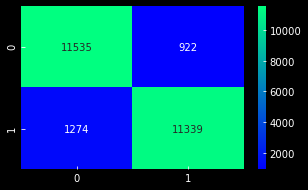

In [157]:
plt.rcParams['figure.figsize'] = (5, 3)
conf_metrix = confusion_matrix(y_test, y_pred)
sbn.heatmap(conf_metrix, annot = True, cmap = 'winter', fmt = '.8g')
plt.show()

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     12457
           1       0.92      0.90      0.91     12613

    accuracy                           0.91     25070
   macro avg       0.91      0.91      0.91     25070
weighted avg       0.91      0.91      0.91     25070



In [159]:
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train_scaled, y_train)
y_pred = decision_model.predict(X_test_scaled)

In [160]:
print('F1_score is {} and Accuracy_score is {} while recall is {}'.format(f1_score(y_test, y_pred),
                                                                         accuracy_score(y_test, y_pred),
                                                                         recall_score(y_test, y_pred)))


F1_score is 0.9383953033268102 and Accuracy_score is 0.9372157957718389 while recall is 0.9504479505272339


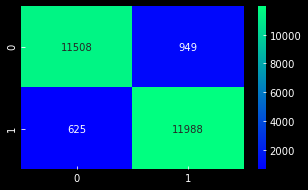

In [161]:
plt.rcParams['figure.figsize'] = (5, 3)
conf_metrix = confusion_matrix(y_test, y_pred)
sbn.heatmap(conf_metrix, annot = True, cmap = 'winter', fmt = '.8g')
plt.show()

In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     12457
           1       0.93      0.95      0.94     12613

    accuracy                           0.94     25070
   macro avg       0.94      0.94      0.94     25070
weighted avg       0.94      0.94      0.94     25070

